# Auto Import test

In [1]:
import requests
import pandas as pd
from datetime import datetime


from pprint import pprint
from io import BytesIO

## Gran Data

In [2]:
gran_data = requests.get('https://dub.sh/ds-data-granular')
gran_data_df = pd.read_parquet((BytesIO(gran_data.content)))
# gran_data_df.to_csv(f'./data/granular_data.csv', index=False)

In [3]:
gran_data_df.info()
copy_gran_df = gran_data_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6245430 entries, 0 to 6245429
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   donor_id    object
 1   visit_date  object
 2   birth_date  int64 
dtypes: int64(1), object(2)
memory usage: 142.9+ MB


In [4]:
gran_data_df.sample(5).head()

,donor_id,visit_date,birth_date
1809386,029oR,2016-12-19,1973
3259011,03NT2,2020-11-07,1986
3725611,04xaP,2017-02-26,1994
2222213,02vPd,2016-08-31,1987
4493697,069Dl,2015-02-08,1973


In [5]:
print(gran_data_df.describe())

         birth_date
count  6.245430e+06
mean   1.984374e+03
std    1.075410e+01
min    1.899000e+03
25%    1.977000e+03
50%    1.986000e+03
75%    1.993000e+03
max    2.024000e+03


In [6]:
print(gran_data_df.isna().sum())

donor_id      0
visit_date    0
birth_date    0
dtype: int64


Axes(0.125,0.11;0.775x0.77)


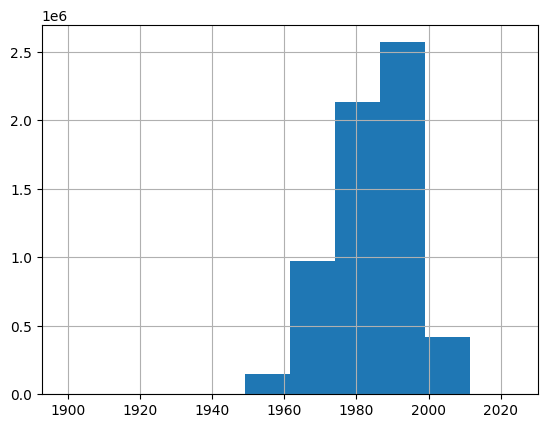

In [7]:
print(gran_data_df['birth_date'].hist())

In [8]:
copy_gran_df['visit_date'] = pd.to_datetime(gran_data_df['visit_date'])


In [9]:
copy_gran_df['current_age'] = datetime.now().year - copy_gran_df['birth_date']
copy_gran_df['visit_age'] = pd.to_datetime(copy_gran_df['visit_date']).dt.year - copy_gran_df['birth_date']
copy_gran_df


,donor_id,visit_date,birth_date,current_age,visit_age
0,00000,2013-11-03,1964,60,49
1,00000,2014-05-26,1964,60,50
2,00000,2015-01-25,1964,60,51
3,00000,2015-08-09,1964,60,51
4,00000,2016-03-10,1964,60,52
...,...,...,...,...,...
6245425,00rqI,2024-01-23,1971,53,53
6245426,02Dtn,2024-01-23,1981,43,43
6245427,02Uuj,2024-01-23,1990,34,34
6245428,09gVV,2024-01-23,1990,34,34


In [10]:
copy_gran_df['days_since_last_visit'] = copy_gran_df.groupby('donor_id')['visit_date'].diff().dt.days
copy_gran_df['months_since_last_visit'] = copy_gran_df['days_since_last_visit'] // 30
copy_gran_df['years_since_last_vist'] = copy_gran_df['months_since_last_visit'] // 12
copy_gran_df = copy_gran_df.fillna(0)
copy_gran_df


,donor_id,visit_date,birth_date,current_age,visit_age,days_since_last_visit,months_since_last_visit,years_since_last_vist
0,00000,2013-11-03,1964,60,49,0.0,0.0,0.0
1,00000,2014-05-26,1964,60,50,204.0,6.0,0.0
2,00000,2015-01-25,1964,60,51,244.0,8.0,0.0
3,00000,2015-08-09,1964,60,51,196.0,6.0,0.0
4,00000,2016-03-10,1964,60,52,214.0,7.0,0.0
...,...,...,...,...,...,...,...,...
6245425,00rqI,2024-01-23,1971,53,53,134.0,4.0,0.0
6245426,02Dtn,2024-01-23,1981,43,43,85.0,2.0,0.0
6245427,02Uuj,2024-01-23,1990,34,34,105.0,3.0,0.0
6245428,09gVV,2024-01-23,1990,34,34,105.0,3.0,0.0


In [11]:
age_bins = [17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
age_labels = ['17-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+']

copy_gran_df['age_group'] = pd.cut(copy_gran_df['current_age'], 
                                   bins=age_bins, labels=age_labels, right=False)

print(copy_gran_df[['current_age', 'age_group']])


         current_age age_group
0                 60     60-64
1                 60     60-64
2                 60     60-64
3                 60     60-64
4                 60     60-64
...              ...       ...
6245425           53     50-54
6245426           43     40-44
6245427           34     30-34
6245428           34     30-34
6245429           33     30-34

[6245430 rows x 2 columns]


In [12]:
visits_age_df = copy_gran_df.groupby(['age_group', copy_gran_df['visit_date'].dt.year])['donor_id'].count().reset_index()
visits_age_df.columns = ['age_group', 'year', 'count']
visits_age_pivot_df = visits_age_df.pivot(index='year', columns='age_group', values='count')
print(visits_age_pivot_df)


C:\Users\alifa\AppData\Local\Temp\ipykernel_9164\570273165.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visits_age_df = copy_gran_df.groupby(['age_group', copy_gran_df['visit_date'].dt.year])['donor_id'].count().reset_index()


age_group  17-24   25-29   30-34  35-39  40-44  45-49  50-54  55-59  60-64  \
year                                                                         
2012           3    2406  117081  79876  61454  50347  42246  32769  23601   
2013           1   22355  116432  77580  61996  51630  42431  32132  22623   
2014           9   53357  109669  80785  67942  57573  46955  35104  24178   
2015          12   81713  106542  87154  74008  62599  50054  37891  24469   
2016          15  101162   98871  83488  73325  60664  48384  35709  22584   
2017        1869  112696   89012  82187  73076  60861  46961  33974  21357   
2018       19857  114035   90119  87420  79729  64596  49132  34293  20533   
2019       41470   99055   87564  86525  80253  63769  47761  32518  18809   
2020       32808   76527   87666  83718  74199  56680  42270  27754  14556   
2021       36800   80107   87466  84808  75010  56584  40482  25962  11593   
2022       66664   82874   89010  89627  82450  62708  45962  28

In [13]:
visits_df = copy_gran_df.groupby(copy_gran_df['visit_date'].dt.year)['donor_id'].count().reset_index()
visits_df.columns = ['year', 'count']
print(visits_df)


    year   count
0   2012  424726
1   2013  439907
2   2014  487806
3   2015  535822
4   2016  533289
5   2017  529124
6   2018  565104
7   2019  560777
8   2020  497590
9   2021  499765
10  2022  559826
11  2023  575403
12  2024   36291


## Trend Plot

In [14]:
import matplotlib.pyplot as plt
import os

def save_fig(fname: str):
    current_dir = os.getcwd()
    print(current_dir)

    try:
        plt.savefig(fname)
    except:
        os.remove(fname)
    else:
        plt.savefig(fname)

In [15]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# from utils.save_fig import save_fig

# plt.figure(figsize=(10,5))
# sns.set(style="whitegrid")

# sns.lineplot(data=visits_df, x='year', y='count', color='red')
# plt.fill_between(visits_df['year'], visits_df['count'], color='red', alpha=0.3)

# formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.ylabel('Donation Count')
# plt.xlabel('Year')
# plt.ylim(0)
# plt.title("Trend of Donations in Malaysia")
# plt.show()



In [16]:
# age_bins = ['19-30', '31-40', '41-50', '51-60', '61+']
# age_bins.sort() 

# plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[1]], label=f'{age_bins[1]}')
# plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[2]], label=f'{age_bins[2]}') 
# plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[3]], label=f'{age_bins[3]}')
# plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[0]], label=f'{age_bins[0]}', color='r')
# plt.bar(visits_age_pivot_df.index, visits_age_pivot_df[age_bins[4]], label=f'{age_bins[4]}', color='violet')
# plt.bar(visits_age_pivot_df.index[:1], visits_age_pivot_df[age_bins[0]][:1], color='r')

# # Order the legends
# handles, labels = plt.gca().get_legend_handles_labels()
# order = [age_bins.index(label) for label in labels]
# plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1.02, 1))



In [17]:
returning_donors = copy_gran_df.groupby('donor_id').filter(lambda x: len(x) > 1)
returning_donors_count = returning_donors.groupby(returning_donors['visit_date'].dt.year)['donor_id'].nunique().reset_index()
returning_donors_count.columns = ['year', 'returning_donors_count']
visits_df = visits_df.merge(returning_donors_count, on='year', how='left').fillna(0)
visits_df


,year,count,returning_donors_count
0,2012,424726,223563
1,2013,439907,250586
2,2014,487806,284223
3,2015,535822,310857
4,2016,533289,316870
5,2017,529124,315940
6,2018,565104,332188
7,2019,560777,331140
8,2020,497590,291563
9,2021,499765,282127


### General Retention Rate of Donors

In [18]:
visits_df['retention_rate'] = round(visits_df['returning_donors_count'].div(visits_df['count']) * 100,1)
print(visits_df)

    year   count  returning_donors_count  retention_rate
0   2012  424726                  223563            52.6
1   2013  439907                  250586            57.0
2   2014  487806                  284223            58.3
3   2015  535822                  310857            58.0
4   2016  533289                  316870            59.4
5   2017  529124                  315940            59.7
6   2018  565104                  332188            58.8
7   2019  560777                  331140            59.1
8   2020  497590                  291563            58.6
9   2021  499765                  282127            56.5
10  2022  559826                  312329            55.8
11  2023  575403                  301144            52.3
12  2024   36291                   28446            78.4


In [19]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.lineplot(data=visits_df, x='year', y='retention_rate', color='black')
sns.scatterplot(data=visits_df, x='year', y='retention_rate', color='red')

plt.ylabel('Retention Rate')
plt.xlabel('Year')
plt.ylim(0)
plt.title("Trend of Retention in Malaysia")
plt.show()


NameError: name 'sns' is not defined

<Figure size 1000x500 with 0 Axes>

### More Detailed Retention Rate of Donors

In [ ]:
regular_donors = returning_donors[returning_donors['days_since_last_visit'] <= 720]
regular_donors_count = regular_donors.groupby(regular_donors['visit_date'].dt.year)['donor_id'].nunique().reset_index()
regular_donors_count.columns = ['year', 'regular_donors_count']

regular_donors_count

,year,regular_donors_count
0,2012,223557
1,2013,250571
2,2014,269997
3,2015,279267
4,2016,273821
5,2017,262910
6,2018,266524
7,2019,261933
8,2020,227230
9,2021,219954


In [ ]:
lapsed_donors = returning_donors[returning_donors['days_since_last_visit'] > 720]
lapsed_donors_count = lapsed_donors.groupby(lapsed_donors['visit_date'].dt.year)['donor_id'].nunique().reset_index()
lapsed_donors_count.columns = ['year', 'lapsed_donor_count']

lapsed_donors_count


,year,lapsed_donor_count
0,2013,9
1,2014,15506
2,2015,35360
3,2016,48129
4,2017,59296
5,2018,73641
6,2019,77797
7,2020,75918
8,2021,72969
9,2022,100442


In [ ]:
new_donors_count = visits_df.copy()
new_donors_count['new_donors_count'] = new_donors_count['count'] - (returning_donors_count['returning_donors_count'])
new_donors_count = new_donors_count.fillna(0)
new_donors_count = new_donors_count.drop(['returning_donors_count','retention_rate'],axis=1)
new_donors_count

,year,count,new_donors_count
0,2012,424726,201169
1,2013,439907,189327
2,2014,487806,203587
3,2015,535822,224967
4,2016,533289,216430
5,2017,529124,213192
6,2018,565104,232926
7,2019,560777,229647
8,2020,497590,206030
9,2021,499765,217645


In [ ]:
new_visits_df = new_donors_count.merge(returning_donors_count, on='year', how='outer').merge(regular_donors_count, on='year', how='outer').merge(lapsed_donors_count, on='year', how='outer')
new_visits_df = new_visits_df.fillna(0)
new_visits_df['lapsed_donor_count'] = new_visits_df['lapsed_donor_count'].apply(lambda x:int(x))
new_visits_df


,year,count,new_donors_count,returning_donors_count,regular_donors_count,lapsed_donor_count
0,2012,424726,201169,223557,223557,0
1,2013,439907,189327,250580,250571,9
2,2014,487806,203587,284219,269997,15506
3,2015,535822,224967,310855,279267,35360
4,2016,533289,216430,316859,273821,48129
5,2017,529124,213192,315932,262910,59296
6,2018,565104,232926,332178,266524,73641
7,2019,560777,229647,331130,261933,77797
8,2020,497590,206030,291560,227230,75918
9,2021,499765,217645,282120,219954,72969


In [ ]:
# new_visits_df.to_csv('new_visits_df.csv')

In [ ]:
# plt.figure(figsize=(10,5))

# plt.bar(new_visits_df['year'],new_visits_df['returning_donors_count'],
#         width=1,color='b',label='Returning Donors')
# plt.bar(new_visits_df['year'],new_visits_df['new_donors_count'],
#         width=1,color='r',label='New Donors')
# plt.bar(new_visits_df['year'],new_visits_df['regular_donors_count'],
#         width=1,color='c',label='Regular Donors')
# plt.bar(new_visits_df['year'][:-3],new_visits_df['new_donors_count'][:-3],
#         width=1,color='r')
# plt.bar(new_visits_df['year'],new_visits_df['lapsed_donor_count'],
#         width=1,color='g',label='Lapsed Donors')

# formatter = ticker.FuncFormatter(lambda x,pos: f"{int(x/1000)}K")
# plt.gca().yaxis.set_major_formatter(formatter)

# plt.xlabel('Year')
# plt.ylabel('Donors')
# plt.title('Types of Donors in Malaysia per Year')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # Percentage Maybe?
# # for i, value in enumerate(new_visits_df['returning_donors_count'][2:-1]):
# #     plt.text(new_visits_df['year'][i+2], value - 30000 , f"{int(value/new_visits_df['count'][i+2]*100)}%", ha='center', color='k')
# # # for i, value in enumerate(new_visits_df['new_donors_count'][:-1]):
# # #     plt.text(new_visits_df['year'][i], value/2 , f"{int(value/new_visits_df['count'][i]*100)}%", ha='center', color='white')
# # # for i, value in enumerate(new_visits_df['regular_donors_count'][:-1]):
# # #     plt.text(new_visits_df['year'][i], value + 100, f"{int(value/new_visits_df['count'][i]*100)}%", ha='center', color='white')
# # for i, value in enumerate(new_visits_df['lapsed_donor_count'][2:-1]):
# #     plt.text(new_visits_df['year'][i+2], value/4, f"{int(value/new_visits_df['count'][i+2]*100)}%", ha='center', color='white')

# plt.show()
# plt.savefig("./images/trend_donor_type_malaysia")
# plt.close()

In [ ]:
new_retention_df = pd.DataFrame()
new_retention_df['year'] = new_visits_df['year'].copy()
new_retention_df['regular_donors_rtn'] = round(new_visits_df['regular_donors_count'].div(new_visits_df['count'])*100,2)
new_retention_df['lapsed_donors_rtn'] = round(new_visits_df['lapsed_donor_count'].div(new_visits_df['count'])*100,2)

In [ ]:

# plt.figure(figsize=(10,5))
# sns.set(style="whitegrid")

# sns.lineplot(data=visits_df, 
#              x='year', 
#              y='retention_rate', 
#              label='Returning Donors',
#              color='r')

# sns.lineplot(data=new_retention_df, 
#              x='year', 
#              y='regular_donors_rtn', 
#              label='Regular Donors',
#              color = 'slateblue')

# sns.lineplot(data=new_retention_df, 
#              x='year', 
#              y='lapsed_donors_rtn', 
#              label='Lapsed Donors',
#              color='darkseagreen')

# # plt.fill_between(visits_df['year'], visits_df['retention_rate'], color='pink')
# # plt.fill_between(new_retention_df['year'], new_retention_df['regular_donors_rtn'], color='c')
# # plt.fill_between(new_retention_df['year'], new_retention_df['lapsed_donors_rtn'], color='palegreen')

# plt.ylabel('Retention Rate')
# plt.xlabel('Year')
# plt.ylim(0)
# plt.title("Trend of Retention in Malaysia")
# plt.show()
# plt.savefig("./images/trend_retention_malaysia")
# plt.close()


## Aggregate Data


## Import


In [ ]:
import os
os.chdir('..')

from github import Github
from utils.vars import GITHUB_KEY
import typing 


token = GITHUB_KEY
g = Github(token)
repo = g.get_repo("MoH-Malaysia/data-darah-public")
contents = repo.get_contents('./')
content_links = [c.download_url for c in contents]


if not os.path.exists('data'):
    os.makedirs('data')

df_dict = {}
for link in content_links:
    filename = link.split('/')[-1]
    df_name = filename.split(".csv")[0]+"_df"
    
    df_dict[df_name] = pd.read_csv(link)
    # df_dict[df_name].to_csv(f'./data/{filename}', index=False)

In [ ]:
df_dict.keys()

dict_keys(['donations_facility_df', 'donations_state_df', 'newdonors_facility_df', 'newdonors_state_df'])

In [ ]:
df_dict['donations_facility_df']


,date,hospital,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Hospital Sultanah Nora Ismail,87,19,20,45,3,87,0,87,0,0,0,86,1,0,36,49,2
1,2006-01-01,Hospital Sultanah Aminah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006-01-01,Hospital Sultanah Bahiyah,208,67,62,61,18,208,0,208,0,0,0,197,8,3,1,207,0
3,2006-01-01,Hospital Raja Perempuan Zainab II,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006-01-01,Hospital Melaka,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145107,2024-01-22,Hospital Tawau,10,3,1,5,1,10,0,10,0,0,0,9,0,1,0,7,3
145108,2024-01-22,Hospital Umum Sarawak,29,4,8,17,0,29,0,29,0,0,0,27,2,0,2,26,1
145109,2024-01-22,Hospital Miri,12,2,6,4,0,12,0,12,0,0,0,11,1,0,0,12,0
145110,2024-01-22,Hospital Sibu,9,2,3,4,0,9,0,9,0,0,0,9,0,0,0,8,1


In [ ]:
df_dict['donations_state_df'].keys()

Index(['date', 'state', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab',
       'location_centre', 'location_mobile', 'type_wholeblood',
       'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other',
       'social_civilian', 'social_student', 'social_policearmy',
       'donations_new', 'donations_regular', 'donations_irregular'],
      dtype='object')

In [ ]:
donations_state_df = df_dict['donations_state_df'][['date', 
                                                    'state', 
                                                    'daily',
                                                    'location_centre',
                                                    'location_mobile',
                                                    'donations_new',
                                                    'donations_regular',
                                                    'donations_irregular',
                                                    ]].copy()
donations_state_df

,date,state,daily,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,308,217,243,277,5
1,2006-01-02,Malaysia,227,162,65,83,143,1
2,2006-01-03,Malaysia,112,112,0,8,101,3
3,2006-01-04,Malaysia,391,145,246,286,102,3
4,2006-01-05,Malaysia,582,371,211,328,250,4
...,...,...,...,...,...,...,...,...
92339,2024-01-18,W.P. Kuala Lumpur,515,116,399,82,272,161
92340,2024-01-19,W.P. Kuala Lumpur,443,108,335,75,221,147
92341,2024-01-20,W.P. Kuala Lumpur,724,168,556,138,447,139
92342,2024-01-21,W.P. Kuala Lumpur,871,206,665,132,547,192


In [ ]:
malaysia_donations_df = donations_state_df.loc[donations_state_df['state'] == 'Malaysia']
malaysia_donations_df


,date,state,daily,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,308,217,243,277,5
1,2006-01-02,Malaysia,227,162,65,83,143,1
2,2006-01-03,Malaysia,112,112,0,8,101,3
3,2006-01-04,Malaysia,391,145,246,286,102,3
4,2006-01-05,Malaysia,582,371,211,328,250,4
...,...,...,...,...,...,...,...,...
6591,2024-01-18,Malaysia,1611,373,1238,416,815,380
6592,2024-01-19,Malaysia,1003,320,683,179,599,225
6593,2024-01-20,Malaysia,1867,177,1690,431,1103,333
6594,2024-01-21,Malaysia,2763,354,2409,409,1829,525


In [ ]:
malaysia_donations_df['date'] = pd.to_datetime(malaysia_donations_df['date'])
malaysia_visits_df = malaysia_donations_df.groupby(malaysia_donations_df['date'].dt.year)['daily'].sum().reset_index()
malaysia_visits_df.columns = ['year', 'count']
print(malaysia_visits_df)


    year   count
0   2006  218892
1   2007  279378
2   2008  348367
3   2009  385280
4   2010  393163
5   2011  416751
6   2012  424726
7   2013  439907
8   2014  487806
9   2015  535822
10  2016  533289
11  2017  529124
12  2018  565104
13  2019  560777
14  2020  497590
15  2021  499765
16  2022  559827
17  2023  575403
18  2024   34966


C:\Users\alifa\AppData\Local\Temp\ipykernel_37476\2531317845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_donations_df['date'] = pd.to_datetime(malaysia_donations_df['date'])


In [ ]:
import numpy as np
# import matplotlib.ticker as ticker

# plt.figure(figsize=(10,5))
# sns.set(style="whitegrid")

# sns.lineplot(data=malaysia_visits_df, x='year', y='count', color='red')
# plt.fill_between(malaysia_visits_df['year'], malaysia_visits_df['count'], color='red', alpha=0.3)

# formatter = ticker.FuncFormatter(lambda x: f"{int(x/1000)}K")
# plt.gca().yaxis.set_major_formatter(formatter)
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# plt.ylabel('Donation Count')
# plt.xlabel('Year')
# plt.title("Trend of Donations in Malaysia")
# plt.show()
# plt.savefig("./images/trend_donations_malaysia")
# plt.close()

In [ ]:
average_7_df = malaysia_donations_df.drop(['location_mobile',
                                            'location_centre'],axis=1).copy()
average_7_df['7_days_avg'] = np.int32(average_7_df['daily'].rolling(window=7).mean().fillna(0))
average_7_df['7_days_avg_regular'] = np.int32(average_7_df['donations_regular'].rolling(window=7).mean().fillna(0))
average_7_df


,date,state,daily,donations_new,donations_regular,donations_irregular,7_days_avg,7_days_avg_regular
0,2006-01-01,Malaysia,525,243,277,5,0,0
1,2006-01-02,Malaysia,227,83,143,1,0,0
2,2006-01-03,Malaysia,112,8,101,3,0,0
3,2006-01-04,Malaysia,391,286,102,3,0,0
4,2006-01-05,Malaysia,582,328,250,4,0,0
...,...,...,...,...,...,...,...,...
6591,2024-01-18,Malaysia,1611,416,815,380,1716,1029
6592,2024-01-19,Malaysia,1003,179,599,225,1696,1017
6593,2024-01-20,Malaysia,1867,431,1103,333,1658,982
6594,2024-01-21,Malaysia,2763,409,1829,525,1643,962


In [ ]:
# plt.figure(figsize=(15,6))
# filtered_df = average_7_df[(pd.to_datetime(average_7_df['date']).dt.year >=  datetime.now().year - 1) & (pd.to_datetime(average_7_df['date']).dt.year <= datetime.now().year)]
# plt.plot(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg'],color = 'red')
# plt.fill_between(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg'],color = 'red',alpha =0.3,label = 'Total Donors')
# plt.fill_between(pd.to_datetime(filtered_df['date']), filtered_df['7_days_avg_regular'],color = 'red',alpha =0.5,label = 'Regular Donors')

# formatter = ticker.FuncFormatter(lambda x: f"{float(x/1000)}K")
# plt.gca().yaxis.set_major_formatter(formatter)
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# plt.xlabel('Date')
# plt.ylabel('Donors')
# plt.title(f'7-day Average of Daily Donations from {datetime.now().year - 1} - {datetime.now().year}')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


## State Trend Plot

In [ ]:
state_donations_df = donations_state_df.loc[donations_state_df['state'] != 'Malaysia']
state_donations_df


,date,state,daily,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
6596,2006-01-01,Johor,87,87,0,36,49,2
6597,2006-01-02,Johor,15,15,0,4,11,0
6598,2006-01-03,Johor,8,8,0,2,5,1
6599,2006-01-04,Johor,33,33,0,25,8,0
6600,2006-01-05,Johor,20,20,0,16,3,1
...,...,...,...,...,...,...,...,...
92339,2024-01-18,W.P. Kuala Lumpur,515,116,399,82,272,161
92340,2024-01-19,W.P. Kuala Lumpur,443,108,335,75,221,147
92341,2024-01-20,W.P. Kuala Lumpur,724,168,556,138,447,139
92342,2024-01-21,W.P. Kuala Lumpur,871,206,665,132,547,192


In [ ]:
state_donations_df['date'] = pd.to_datetime(state_donations_df['date'])
state_visits_df = state_donations_df.pivot_table(index=state_donations_df['date'].dt.year, columns='state', values='daily', aggfunc='sum').reset_index()
state_visits_df.columns = ['year'] + state_visits_df.columns[1:].tolist()
print(state_visits_df)

C:\Users\alifa\AppData\Local\Temp\ipykernel_37476\1052565719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_donations_df['date'] = pd.to_datetime(state_donations_df['date'])


    year  Johor  Kedah  Kelantan  Melaka  Negeri Sembilan  Pahang  Perak  \
0   2006   8487  30056      5328    6976             3887    3258     53   
1   2007   6462  27126      9786   24078            13284    3237     53   
2   2008   9336  42739     11308   26107            13723    3140  23714   
3   2009  25702  44862     11520   26653            13001    3414  26092   
4   2010  32535  47301     12607   27341            14111    3322  28340   
5   2011  32812  53314     10916   27532            14498    7458  32125   
6   2012  34180  53664      9052   27807            14299   12587  33604   
7   2013  34370  54989     10351   29156            15834   11491  38515   
8   2014  35820  57014     10504   28079            14785   11550  38455   
9   2015  36912  59888     15468   28539            17011   11677  39803   
10  2016  30601  58750     15111   29942            17955   10995  41848   
11  2017  34549  61386        35   30233            17111    9552  41975   
12  2018  36

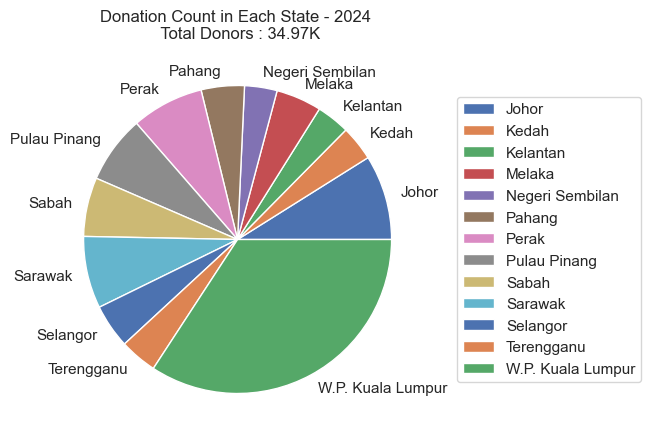

In [ ]:
# Filter the dataframe for the year 2024
state_visits_2024 = state_visits_df[state_visits_df['year'] == 2024].iloc[:, 1:].sum()
# Create a pie chart for the year 2024
plt.figure(figsize=(10,5))
plt.pie(state_visits_2024, labels=state_visits_2024.index)
plt.title(f"Donation Count in Each State - 2024 \n Total Donors : {round(state_visits_2024.sum()/1000,2)}K")

# Move the percentage labels outside of the chart
plt.legend(state_visits_2024.index, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()


C:\Users\alifa\AppData\Local\Temp\ipykernel_37476\2334756697.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('OrRd', len(state_visits_2024))


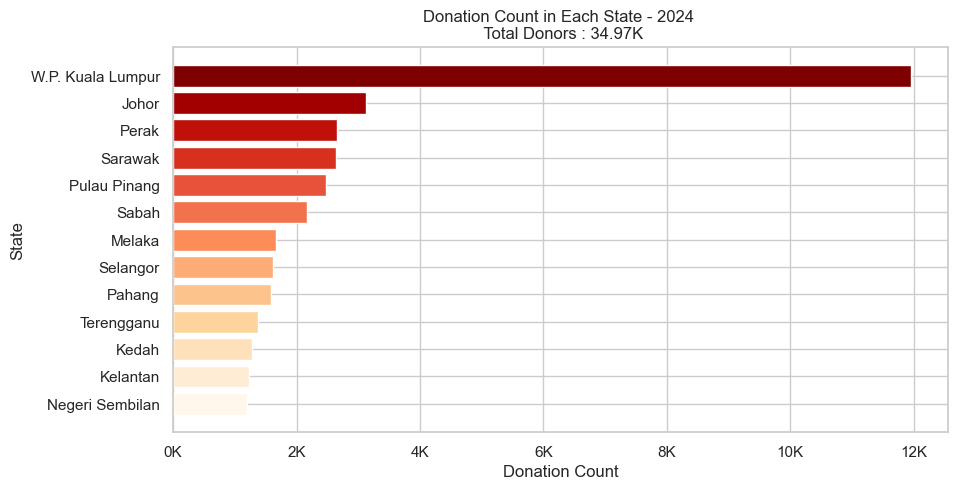

In [ ]:
import numpy as np
import matplotlib.ticker as ticker

# Filter the dataframe for the year 2024
state_visits_2024 = state_visits_df[state_visits_df['year'] == 2024].iloc[:, 1:].sum()

# Sort the states based on the number of counts
sorted_states = state_visits_2024.sort_values(ascending=True).index

# Create a horizontal bar chart for the year 2024 with color hue gradient
plt.figure(figsize=(10, 5))
colors = plt.cm.get_cmap('OrRd', len(state_visits_2024))
plt.barh(sorted_states, state_visits_2024[sorted_states], color=colors(np.arange(len(state_visits_2024))))
plt.title(f"Donation Count in Each State - 2024 \n Total Donors : {round(state_visits_2024.sum()/1000,2)}K")

# Format x ticks to show "40K" instead of 40000
formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Donation Count')
plt.ylabel('State')
plt.show()


## Get Daily Data

In [ ]:
donations_state_df

,date,state,daily,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,308,217,243,277,5
1,2006-01-02,Malaysia,227,162,65,83,143,1
2,2006-01-03,Malaysia,112,112,0,8,101,3
3,2006-01-04,Malaysia,391,145,246,286,102,3
4,2006-01-05,Malaysia,582,371,211,328,250,4
...,...,...,...,...,...,...,...,...
92339,2024-01-18,W.P. Kuala Lumpur,515,116,399,82,272,161
92340,2024-01-19,W.P. Kuala Lumpur,443,108,335,75,221,147
92341,2024-01-20,W.P. Kuala Lumpur,724,168,556,138,447,139
92342,2024-01-21,W.P. Kuala Lumpur,871,206,665,132,547,192


In [ ]:
from datetime import datetime, timedelta

donations_state_df['date'] = pd.to_datetime(donations_state_df['date'])

latest_date = donations_state_df['date'].max()
start_date = latest_date - timedelta(days=1)

daily_df = donations_state_df.loc[(donations_state_df['date'] >= start_date) & (donations_state_df['date'] <= latest_date)].reset_index(drop=True)
daily_df

,date,state,daily,location_centre,location_mobile,donations_new,donations_regular,donations_irregular
0,2024-01-21,Malaysia,2763,354,2409,409,1829,525
1,2024-01-22,Malaysia,819,402,417,132,589,98
2,2024-01-21,Johor,362,88,274,53,251,58
3,2024-01-22,Johor,100,31,69,25,64,11
4,2024-01-21,Kedah,53,21,32,12,30,11
5,2024-01-22,Kedah,52,13,39,18,27,7
6,2024-01-21,Kelantan,49,24,25,10,23,16
7,2024-01-22,Kelantan,45,45,0,3,32,10
8,2024-01-21,Melaka,160,0,160,18,111,31
9,2024-01-22,Melaka,19,19,0,1,17,1


In [ ]:
def change_number(latest,previous):
    delta = int((latest - previous)/latest * 100)
    if delta > 0:
        return f"🔺{abs(delta)}% "
    else:
        return f"🔻{abs(delta)}%"
    

In [ ]:
latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'daily'].values[0])
previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=1)) & (daily_df['state'] == 'Malaysia'), 'daily'].values[0])

new_latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'donations_new'].values[0])
new_previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=1)) & (daily_df['state'] == 'Malaysia'), 'donations_new'].values[0])

regular_latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'donations_regular'].values[0])
regular_previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=1)) & (daily_df['state'] == 'Malaysia'), 'donations_regular'].values[0])

others_latest_donors = int(daily_df.loc[(daily_df['date'] == latest_date) & (daily_df['state'] == 'Malaysia'), 'donations_irregular'].values[0])
others_previous_donors = int(daily_df.loc[(daily_df['date'] == latest_date - timedelta(days=1)) & (daily_df['state'] == 'Malaysia'), 'donations_irregular'].values[0])

message = f'''
==Latest Update as of {daily_df['date'].loc[daily_df['date'] == latest_date].drop_duplicates().values[0].astype('datetime64[D]')}==

Total Donors  : {latest_donors} {change_number(latest_donors,previous_donors)} 
    - New     : {daily_df.loc[(daily_df['state'] == 'Malaysia') & (daily_df['date'] == latest_date), 'donations_new'].values[0]} {change_number(new_latest_donors,new_previous_donors)} 
    - Regular : {daily_df.loc[(daily_df['state'] == 'Malaysia') & (daily_df['date'] == latest_date), 'donations_regular'].values[0]} {change_number(regular_latest_donors,regular_previous_donors)}
    - Others  : {daily_df.loc[(daily_df['state'] == 'Malaysia') & (daily_df['date'] == latest_date), 'donations_irregular'].values[0]} {change_number(others_latest_donors,others_previous_donors)}
'''

print(message)

with open('./Codes/Assesment/daily_texts/daily_message.txt','w',encoding='utf-8') as f:
    f.write(message)



==Latest Update as of 2024-01-22==

Total Donors  : 819 🔻237% 
    - New     : 132 🔻209% 
    - Regular : 589 🔻210%
    - Others  : 98 🔻435%



## New Donors Trend

In [ ]:
df_dict['newdonors_state_df'].keys()

Index(['date', 'state', '17-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', 'other', 'total'],
      dtype='object')

In [ ]:
new_donors_df = df_dict['newdonors_state_df'].copy()
malaysia_new_donors_df = new_donors_df.loc[new_donors_df['state'] == 'Malaysia']
malaysia_new_donors_df

,date,state,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,other,total
0,2006-01-01,Malaysia,124,31,31,18,24,7,5,2,1,0,243
1,2006-01-02,Malaysia,16,15,11,8,19,6,6,2,0,0,83
2,2006-01-03,Malaysia,1,2,1,2,1,0,0,1,0,0,8
3,2006-01-04,Malaysia,171,35,27,13,16,16,6,1,0,1,286
4,2006-01-05,Malaysia,219,41,22,13,16,8,8,1,0,0,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,2024-01-18,Malaysia,140,104,70,62,20,10,7,3,0,0,416
6592,2024-01-19,Malaysia,62,34,27,14,21,15,4,1,0,1,179
6593,2024-01-20,Malaysia,166,76,49,41,47,20,16,15,1,0,431
6594,2024-01-21,Malaysia,104,60,56,65,51,33,25,10,5,0,409


In [ ]:
malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date'])
malaysia_new_donors_count= malaysia_new_donors_df.groupby(malaysia_new_donors_df['date'].dt.year)['total'].sum().reset_index()
malaysia_new_donors_count.columns = ['year', 'count']
print(malaysia_new_donors_count)

    year   count
0   2006  136426
1   2007  153430
2   2008  184850
3   2009  179634
4   2010  167712
5   2011  166013
6   2012  156780
7   2013  156492
8   2014  179072
9   2015  183171
10  2016  169744
11  2017  156942
12  2018  163316
13  2019  157808
14  2020  115606
15  2021   96702
16  2022  120929
17  2023  118285
18  2024    6944


C:\Users\alifa\AppData\Local\Temp\ipykernel_37476\3634041539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date'])


In [ ]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

sns.barplot(data=malaysia_new_donors_count, x='year', y='count', color='salmon')

formatter = ticker.FuncFormatter(lambda x:f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.ylabel('Donation Count')
plt.xlabel('Year')
plt.title("Trend of New Donors in Malaysia")
plt.show()

TypeError: <lambda>() takes 1 positional argument but 2 were given

<Figure size 1000x500 with 1 Axes>

In [ ]:
malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date'])
malaysia_new_donors_age_count = malaysia_new_donors_df.groupby(malaysia_new_donors_df['date'])[['17-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64']].sum().reset_index()
malaysia_new_donors_age_count.columns = ['date', '17-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64']
malaysia_new_donors_age_count


C:\Users\alifa\AppData\Local\Temp\ipykernel_34208\1208342333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malaysia_new_donors_df['date'] = pd.to_datetime(malaysia_new_donors_df['date'])


,date,17-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64
0,2006-01-01,124,31,31,18,24,7,5,2,1
1,2006-01-02,16,15,11,8,19,6,6,2,0
2,2006-01-03,1,2,1,2,1,0,0,1,0
3,2006-01-04,171,35,27,13,16,16,6,1,0
4,2006-01-05,219,41,22,13,16,8,8,1,0
...,...,...,...,...,...,...,...,...,...,...
6590,2024-01-17,160,67,57,77,39,23,13,3,0
6591,2024-01-18,140,104,70,62,20,10,7,3,0
6592,2024-01-19,62,34,27,14,21,15,4,1,0
6593,2024-01-20,166,76,49,41,47,20,16,15,1


Text(0.5, 1.0, 'New Donors By Age Group From 2023 - 2024')

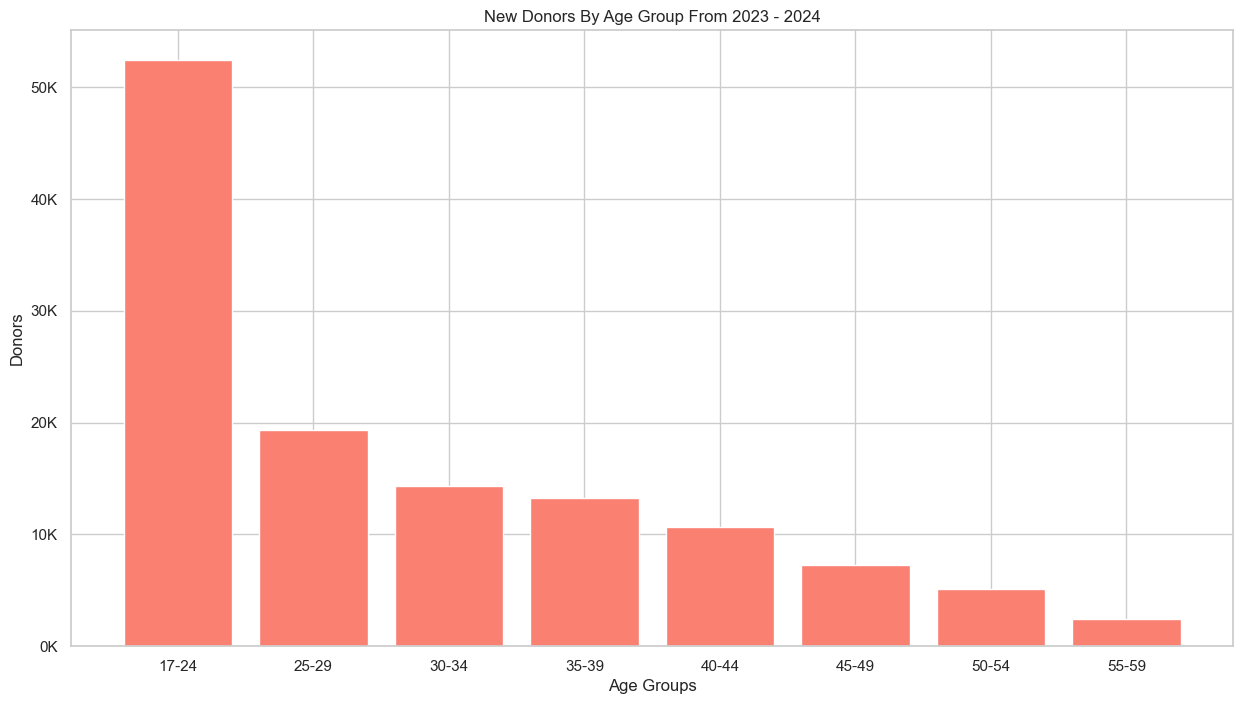

In [ ]:
filtered_df = malaysia_new_donors_age_count[(pd.to_datetime(malaysia_new_donors_age_count['date']).dt.year >=  datetime.now().year - 1) & (pd.to_datetime(malaysia_new_donors_age_count['date']).dt.year <= datetime.now().year)]
filtered_df = filtered_df.drop('date',axis=1)
filtered_df = filtered_df.sum()


plt.figure(figsize=(15,8))
plt.bar(filtered_df.index[:-1],filtered_df.values[:-1],color='salmon')

formatter = ticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}K")
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Age Groups')
plt.ylabel('Donors')
plt.title(f'New Donors By Age Group From {datetime.now().year - 1} - {datetime.now().year}')







## Daily Records


In [ ]:
## Daily Records
 